In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_fbisg = pd.read_csv("we_res/predicted_weighted_estimators_fBISG.csv")
df_bifsg = pd.read_csv("we_res/predicted_weighted_estimators_BIFSG.csv")
df_actual = pd.read_csv("we_res/actual_weighted_estimators.csv")
df_bisg = pd.read_csv("we_res/predicted_weighted_estimators_BISG.csv")

df_actual["estimator"] = "True"
df_fbisg["estimator"] = "fBISG"
df_bifsg["estimator"] = "BIFSG"
df_bisg["estimator"] = "BISG"

In [3]:
print(df_fbisg.shape)
print(df_bifsg.shape)
print(df_bisg.shape)
print(df_actual.shape)

(45, 4)
(45, 4)
(45, 4)
(45, 4)


In [4]:
# map race
race_map = {
    "pred.whi": "white",
    "pred.bla": "black",
    "pred.his": "hispanic",
    "pred.asi": "api",
    "pred.oth": "other"
}
df_fbisg["race"] = df_fbisg["race"].replace(race_map)
df_bisg["race"] = df_bisg["race"].replace(race_map)
df_bifsg["race"] = df_bifsg["race"].replace(race_map)

df_all = pd.concat([df_actual, df_bisg, df_bifsg, df_fbisg], ignore_index=True)
df_all = df_all[df_all["party"].isin(["REP", "DEM", "UNA"])]
pd.set_option("display.max_rows", None)
df_all = df_all.rename(columns={"weighted_estimator": "Weighted Estimator"})
df_all.head()


,party,race,Weighted Estimator,estimator
0,REP,api,0.17946,True
1,REP,black,0.02950,True
2,REP,hispanic,0.17053,True
3,REP,other,0.19109,True
4,REP,white,0.41580,True


In [25]:
df_actual_filtered = df_actual[df_actual["party"].isin(["REP", "DEM", "UNA"])]
df_bisg_filtered = df_bisg[df_bisg["party"].isin(["REP", "DEM", "UNA"])]
df_fbisg_filtered = df_fbisg[df_fbisg["party"].isin(["REP", "DEM", "UNA"])]
df_bifsg_filtered = df_bifsg[df_bifsg["party"].isin(["REP", "DEM", "UNA"])]

race_order = ["party", "white", "black", "hispanic", "api", "other"]
df_actual_wide = df_actual_filtered.pivot_table(
    index="party",
    columns="race",
    values="weighted_estimator"
).reset_index()
df_actual_wide = df_actual_wide[race_order]

df_bisg_wide = df_bisg_filtered.pivot_table(
    index="party",
    columns="race",
    values="weighted_estimator"
).reset_index()
df_bisg_wide = df_bisg_wide[race_order]

df_fbisg_wide = df_fbisg_filtered.pivot_table(
    index="party",
    columns="race",
    values="weighted_estimator"
).reset_index()
df_fbisg_wide = df_fbisg_wide[race_order]

df_bifsg_wide = df_bifsg_filtered.pivot_table(
    index="party",
    columns="race",
    values="weighted_estimator"
).reset_index()
df_bifsg_wide = df_bifsg_wide[race_order]

print(df_actual_wide)
print(df_bisg_wide)
print(df_fbisg_wide)
print(df_bifsg_wide)

race party    white    black  hispanic      api    other
0      DEM  0.19357  0.72544   0.34822  0.28380  0.34058
1      REP  0.41580  0.02950   0.17053  0.17946  0.19109
2      UNA  0.38041  0.23506   0.45965  0.52418  0.45233
race party    white    black  hispanic      api    other
0      DEM  0.26357  0.47230    0.3371  0.30915  0.33234
1      REP  0.35968  0.21507    0.2139  0.18911  0.30059
2      UNA  0.36641  0.30215    0.4309  0.48934  0.35626
race party    white    black  hispanic      api    other
0      DEM  0.26278  0.46450   0.34015  0.31185  0.33008
1      REP  0.35786  0.21946   0.22120  0.18469  0.30041
2      UNA  0.36886  0.30539   0.42147  0.49114  0.35855
race party    white    black  hispanic      api    other
0      DEM  0.24844  0.53019   0.34486  0.30616  0.33618
1      REP  0.37328  0.17246   0.19314  0.17153  0.27373
2      UNA  0.36812  0.28668   0.44285  0.51011  0.37745


In [36]:
df_bisg_diff = df_bisg_wide.copy()
df_bisg_diff.iloc[:, 1:] = df_bisg_wide.iloc[:, 1:] - df_actual_wide.iloc[:, 1:]

df_fbisg_diff = df_bisg_wide.copy()
df_fbisg_diff.iloc[:, 1:] = df_fbisg_wide.iloc[:, 1:] - df_actual_wide.iloc[:, 1:]

df_bifsg_diff = df_bisg_wide.copy()
df_bifsg_diff.iloc[:, 1:] = df_bifsg_wide.iloc[:, 1:] - df_actual_wide.iloc[:, 1:]

df_fbisg_diff["estimator"] = "fBISG"
df_bifsg_diff["estimator"] = "BIFSG"
df_bisg_diff["estimator"] = "BISG"

df_diff_all = pd.concat([df_bisg_diff, df_bifsg_diff, df_fbisg_diff], ignore_index=True)
df_diff_all

race,party,white,black,hispanic,api,other,estimator
0,DEM,0.07000,-0.25314,-0.01112,0.02535,-0.00824,BISG
1,REP,-0.05612,0.18557,0.04337,0.00965,0.10950,BISG
2,UNA,-0.01400,0.06709,-0.02875,-0.03484,-0.09607,BISG
3,DEM,0.05487,-0.19525,-0.00336,0.02236,-0.00440,BIFSG
4,REP,-0.04252,0.14296,0.02261,-0.00793,0.08264,BIFSG
5,UNA,-0.01229,0.05162,-0.01680,-0.01407,-0.07488,BIFSG
6,DEM,0.06921,-0.26094,-0.00807,0.02805,-0.01050,fBISG
7,REP,-0.05794,0.18996,0.05067,0.00523,0.10932,fBISG
8,UNA,-0.01155,0.07033,-0.03818,-0.03304,-0.09378,fBISG


In [37]:
df_long = pd.melt(
    df_diff_all,
    id_vars=["party", "estimator"],
    value_vars=["white", "black", "hispanic", "api", "other"],
    var_name="race",
    value_name="Weighted Estimator"
)
df_long.head(10)

,party,estimator,race,Weighted Estimator
0,DEM,BISG,white,0.07000
1,REP,BISG,white,-0.05612
2,UNA,BISG,white,-0.01400
3,DEM,BIFSG,white,0.05487
4,REP,BIFSG,white,-0.04252
5,UNA,BIFSG,white,-0.01229
6,DEM,fBISG,white,0.06921
7,REP,fBISG,white,-0.05794
8,UNA,fBISG,white,-0.01155
9,DEM,BISG,black,-0.25314


/var/folders/c2/yr7c8mdd4d1b6605x9n53m0w0000gn/T/ipykernel_61851/1421436622.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(
/var/folders/c2/yr7c8mdd4d1b6605x9n53m0w0000gn/T/ipykernel_61851/1421436622.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(
/var/folders/c2/yr7c8mdd4d1b6605x9n53m0w0000gn/T/ipykernel_61851/1421436622.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(


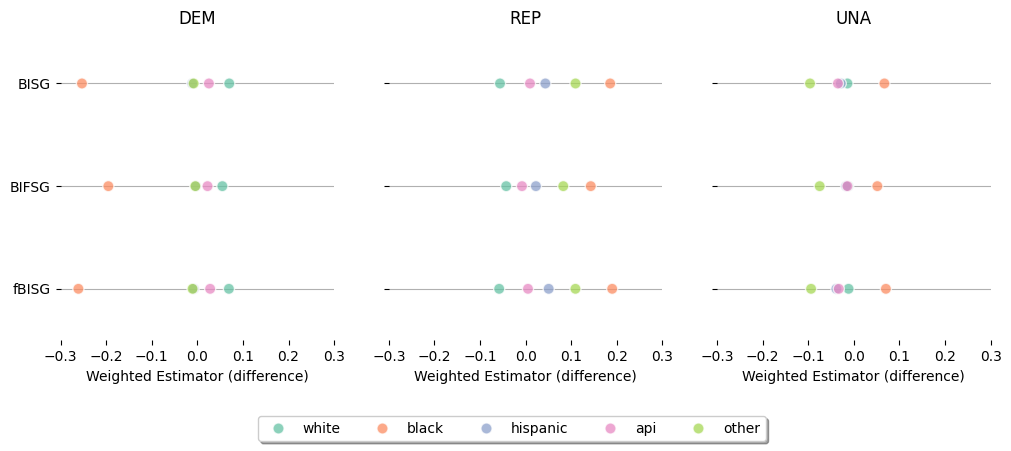

In [40]:
# vis
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, party in enumerate(["DEM", "REP", "UNA"]):
    df_party = df_long[df_long["party"] == party]
    
    sns.stripplot(
        data=df_party, 
        x="Weighted Estimator", 
        y="estimator", 
        hue="race", 
        hue_order=["white", "black", "hispanic", "api", "other"],
        ax=axs[i], 
        palette=sns.color_palette("Set2"), 
        size=8, 
        jitter=False, 
        alpha=0.75,
        linewidth=1, 
        edgecolor="w"
    )
    axs[i].set_ylabel("")
    axs[i].set_xlim(-0.3, 0.3) # Set x-axis limits
    axs[i].set_xlabel("Weighted Estimator (difference)")
    axs[i].xaxis.grid(False)
    axs[i].yaxis.grid(True)
    party = party[0].upper() + party[1:]
    axs[i].set_title(party)
    if i != 0:
        axs[i].set_yticklabels([])
    if i == 2:
        plt.legend(loc="lower center", ncol=5, fancybox=True, shadow=True, bbox_to_anchor=(-.75, -.35))
    else: 
        axs[i].get_legend().remove()

sns.despine(left = True, bottom = True)
plt.show()

/var/folders/c2/yr7c8mdd4d1b6605x9n53m0w0000gn/T/ipykernel_61851/1160347153.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(
/var/folders/c2/yr7c8mdd4d1b6605x9n53m0w0000gn/T/ipykernel_61851/1160347153.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(
/var/folders/c2/yr7c8mdd4d1b6605x9n53m0w0000gn/T/ipykernel_61851/1160347153.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(


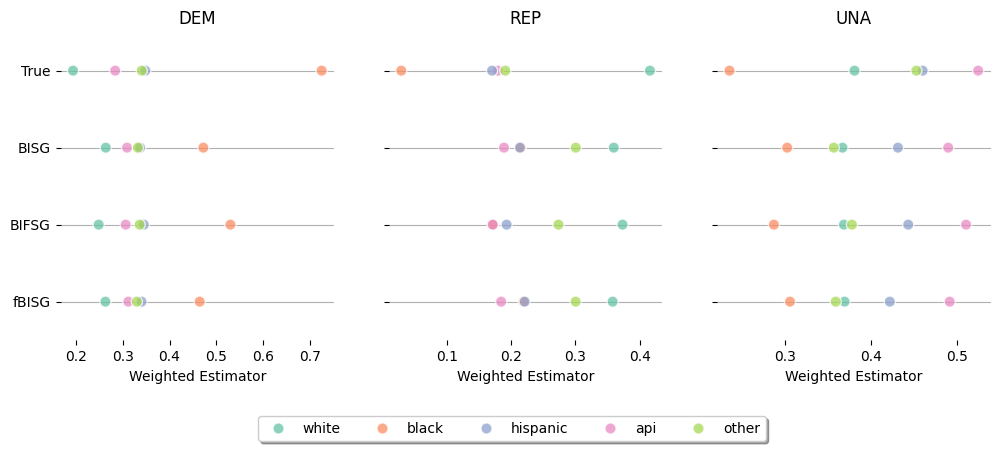

In [5]:
# vis
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, party in enumerate(["DEM", "REP", "UNA"]):
    df_party = df_all[df_all["party"] == party]
    
    sns.stripplot(
        data=df_party, 
        x="Weighted Estimator", 
        y="estimator", 
        hue="race", 
        hue_order=["white", "black", "hispanic", "api", "other"],
        ax=axs[i], 
        palette=sns.color_palette("Set2"), 
        size=8, 
        jitter=False, 
        alpha=0.75,
        linewidth=1, 
        edgecolor="w"
    )
    axs[i].set_ylabel("")
    axs[i].xaxis.grid(False)
    axs[i].yaxis.grid(True)
    party = party[0].upper() + party[1:]
    axs[i].set_title(party)
    if i != 0:
        axs[i].set_yticklabels([])
    if i == 2:
        plt.legend(loc="lower center", ncol=5, fancybox=True, shadow=True, bbox_to_anchor=(-.75, -.35))
    else: 
        axs[i].get_legend().remove()

sns.despine(left = True, bottom = True)
plt.show()

## Evaluation

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.calibration import calibration_curve

def compute_ece(y_true, y_probs, n_bins=10):
    class_names = ["white", "black", "hispanic", "api", "other"]
    true_labels = np.array([class_names.index(label) for label in y_true])

    confidences = np.max(y_probs, axis=1)
    predictions = np.argmax(y_probs, axis=1)
    correct = (predictions == true_labels).astype(float)

    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(confidences, bins) - 1

    ece = 0.0
    for i in range(n_bins):
        mask = (bin_indices == i)
        bin_size = np.sum(mask)
        if bin_size > 0:
            bin_confidence = confidences[mask].mean()
            bin_accuracy = correct[mask].mean()
            ece += np.abs(bin_confidence - bin_accuracy) * (bin_size / len(y_true))

    return ece

In [110]:
bisg_res = pd.read_csv("zp20/sp10/wru_bifsg.csv")
bisg_res.shape

(6885206, 18)

In [ ]:
# Use 1 - this value as the Coverage
(6975377 - bisg_res.shape[0]) / 6975377

0.012927043226480806

In [112]:
df_bisg = bisg_res[["true_race", "pred.whi", "pred.bla", "pred.his", "pred.asi", "pred.oth"]]
# Rename columns
df_bisg = df_bisg.rename(columns={
    "true_race": "race",
    "pred.whi": "white",
    "pred.bla": "black",
    "pred.his": "hispanic",
    "pred.asi": "api",
    "pred.oth": "other"
})
y_true = df_bisg["race"].values
y_probs = df_bisg[["white", "black", "hispanic", "api", "other"]].values
class_names = ["white", "black", "hispanic", "api", "other"]
y_pred = np.array(class_names)[np.argmax(y_probs, axis=1)]
df_bisg[["race", "white", "black", "hispanic", "api", "other"]]

,race,white,black,hispanic,api,other
0,white,0.822629,0.132646,0.006746,0.005900,0.032079
1,white,0.717613,0.194044,0.025091,0.007656,0.055596
2,white,0.365975,0.084014,0.506137,0.004350,0.039524
3,white,0.736792,0.233229,0.002920,0.000773,0.026286
4,white,0.756590,0.191427,0.006486,0.003792,0.041705
...,...,...,...,...,...,...
6885201,white,0.989096,0.000117,0.000000,0.000000,0.010787
6885202,white,0.979657,0.000415,0.000000,0.000000,0.019928
6885203,white,0.984356,0.000043,0.000046,0.000017,0.015538
6885204,white,1.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, labels=class_names, average="macro")
ll = log_loss(y_true, y_probs, labels=class_names)
ece10 = compute_ece(y_true, y_probs, n_bins=10)
cov = np.mean(~np.isnan(y_probs).any(axis=1))

print(f"Accuracy (Acc): {acc:.4f}")
print(f"Macro-F1 (F1): {f1:.4f}")
print(f"Log-loss (LL): {ll:.4f}")
print(f"ECE10: {ece10:.4f}")
print(f"Coverage (Cov): {cov:.4f}")

Accuracy (Acc): 0.8210
Macro-F1 (F1): 0.6401
Log-loss (LL): 3.7046
ECE10: 0.0085
Coverage (Cov): 1.0000
